In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
def dataset_static_model(traindata_path, valdata_path, testdata_path, X, Y):
    """
    This function is used to generate data for machine learning models having different datasets prepared for training validation and testing.
    :param traindata_path: provide complete filepath of training dataset generated.
    :param valdata_path: provide complete filepath of validation dataset generated.
    :param testdata_path: provide complete filepath of testing dataset generated
    :param X: columns names which will be used as input features for machine learning models
    :param Y: Target/Labels for machine learning models
    :return: returns the data splited into features and labels for training validation and testing
    """

    train_data = pd.read_hdf(traindata_path, key='table')
    val_data = pd.read_hdf(valdata_path, key='table')
    test_data = pd.read_hdf(testdata_path, key='table')

    train_data_X = train_data[X]
    train_data_Y = train_data[Y]
    val_data_X = val_data[X]
    val_data_Y = val_data[Y]
    test_data_X = test_data[X]
    test_data_Y = test_data[Y]

    return train_data_X, train_data_Y, val_data_X, val_data_Y, test_data_X, test_data_Y

In [3]:
def dataset_dynamic_model(dataset_path, X, Y, shuffle):
    """
    This function split the single dataset into training validation and testing data.
    :param dataset_path: Provide the complete dataset path
    :param X: Input feature column names
    :param Y: target/label column names
    :param shuffle: Set it to True if shuffling is needed. Else set it to False
    :return: returns the data splited into features and labels for training validation and testing
    """

    dataset = pd.read_hdf(dataset_path, key="table")
    x = dataset[X].values
    y = dataset[Y].values

    X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, shuffle=shuffle)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, shuffle=shuffle)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [4]:
data = pd.read_hdf("Dataset.h5", key="table")

In [11]:
train_X = data[['VM9.V [V]', 'VM7.V [V]', 'VM8.V [V]']]
train_Y = data[['Moving1.Torque [NewtonMeter]','i_a', 'i_b', 'i_c']]

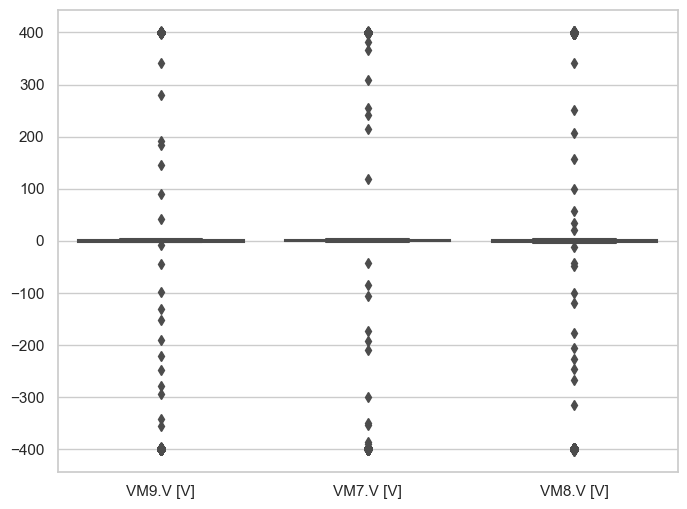

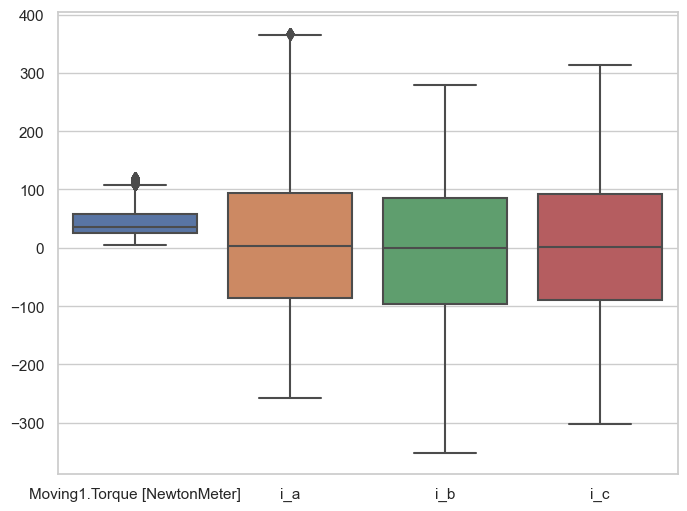

In [14]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_X)
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_Y)

# Show plot
plt.show()

In [31]:
# Function to calculate Z-scores and detect anomalies
def detect_anomalies_zscore(df, threshold=3):
    # Calculate Z-scores
    z_scores = (df - df.mean()) / df.std()

    # Identify anomalies
    anomalies = (np.abs(z_scores) > threshold)

    return anomalies, z_scores



In [33]:
# Detect anomalies in the DataFrame
anomalies_X, z_scores_X = detect_anomalies_zscore(train_X, threshold=2)
anomalies_Y, z_scores_Y = detect_anomalies_zscore(train_Y, threshold=2)
# Display the anomalies and corresponding Z-scores
print("Anomalies Detected:")
print(anomalies_X,anomalies_Y)
print("\nZ-Scores:")
print(z_scores_X,z_scores_Y)

Anomalies Detected:
        VM9.V [V]  VM7.V [V]  VM8.V [V]
0           False      False      False
1           False      False      False
2           False      False      False
3           False      False      False
4           False      False      False
...           ...        ...        ...
319995      False      False      False
319996      False      False      False
319997      False      False      False
319998      False      False      False
319999      False      False      False

[320000 rows x 3 columns]         Moving1.Torque [NewtonMeter]    i_a    i_b    i_c
0                              False  False  False  False
1                              False  False  False  False
2                              False  False  False  False
3                              False  False  False  False
4                              False  False  False  False
...                              ...    ...    ...    ...
319995                         False  False  False  False
319996   

In [29]:
def anamolies_count(anomalies):
    count = 0
    for col in anomalies.columns:
        for i in range(len(anomalies)):
            if anomalies[col][i] == True:
                count =+1
        print(f"Number of anomalies in {col}: {count}")
        count = 0

In [34]:
anamolies_count(anomalies_X)
anamolies_count(anomalies_Y)

Number of anomalies in VM9.V [V]: 0
Number of anomalies in VM7.V [V]: 0
Number of anomalies in VM8.V [V]: 0
Number of anomalies in Moving1.Torque [NewtonMeter]: 1
Number of anomalies in i_a: 1
Number of anomalies in i_b: 1
Number of anomalies in i_c: 1
